In [2]:
import pandas as pd 
import numpy as np   
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing
import seaborn as sns
from sklearn.decomposition import PCA



# EXPLORING DATA

In [3]:
mcdonalds= pd.read_csv('mcdonalds.csv')
mcdonalds.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [4]:
# Convert "Yes" values to 1, "No" values to 0
mcdonalds.replace({"Yes": 1, "No": 0}, inplace=True)
#convert the negative reviews to -5 and, extremely postitive to 5 as we have some strings in the column
mcdonalds['Like'] = mcdonalds['Like'].replace('I hate it!-5', -5)
mcdonalds['Like'] = mcdonalds['Like'].replace('I love it!+5', 5)
mcdonalds['Like'] = mcdonalds['Like'].astype(int)

#convert frequency which is never to 0
mcdonalds['VisitFrequency'] = np.where(mcdonalds['VisitFrequency'] == 'Never', 0, 1)
# convert male ad females to 1s and 0s   #All these changes are done as we have to get the classification tree which won't take string inputs
mcdonalds['Gender'] = np.where(mcdonalds['Gender'] == 'Female', 0, 1)

In [5]:
mcdonalds.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,1,0
1,1,1,0,1,1,1,1,1,1,0,0,2,51,1,0
2,0,1,1,1,1,1,0,1,1,1,0,1,62,1,0
3,1,1,0,1,1,1,1,1,0,0,1,4,69,1,0
4,0,1,0,1,1,1,1,0,0,1,0,2,49,1,1


In [6]:
mcdonalds.keys()

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')

In [7]:
mcdonalds.shape

(1453, 15)

In [8]:
mcdonalds.iloc[:, 0:11].mean().round(2)

yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64

In [9]:
df=mcdonalds.iloc[:, 0:11]

In [10]:
pca=PCA()
pca_data=pca.fit_transform(df)

In [11]:
print(pca.explained_variance_ratio_)
print(pca.singular_values_)
print(pca.explained_variance_)

[0.29944723 0.19279721 0.13304535 0.08309578 0.05948052 0.05029956
 0.0438491  0.03954779 0.0367609  0.03235329 0.02932326]
[28.84746118 23.14716582 19.22858381 15.19626736 12.85685762 11.82305052
 11.03895052 10.48355462 10.10742431  9.48214684  9.02721076]
[0.57312398 0.36900226 0.2546408  0.15904032 0.11384214 0.09627033
 0.08392454 0.07569209 0.07035814 0.06192225 0.05612296]


In [12]:
print(pca.components_)

[[-0.47693349 -0.15533159 -0.00635636  0.11623168  0.3044427  -0.10849325
  -0.33718593 -0.47151394  0.32904173 -0.21371062  0.37475293]
 [ 0.36378978  0.016414    0.01880869 -0.03409395 -0.06383884 -0.0869722
  -0.61063276  0.3073178   0.60128596  0.07659344 -0.13965633]
 [-0.30444402 -0.0625153  -0.03701866 -0.32235949 -0.80237317 -0.06464172
  -0.14931026 -0.28726479  0.02439661  0.19205128 -0.08857138]
 [ 0.0551622  -0.14242496  0.19761927 -0.35413876  0.2539601  -0.09736269
   0.11895823 -0.00254696  0.06781599  0.76348804  0.36953871]
 [-0.30753507  0.27760805  0.07062017 -0.07340475  0.36139895  0.10793025
  -0.12897259 -0.21089912 -0.00312457  0.28784553 -0.72920859]
 [ 0.17073819 -0.34783006 -0.3550866  -0.40651542  0.20934711 -0.59463206
  -0.10324067 -0.07691443 -0.26134151 -0.17822612 -0.21087805]
 [-0.28051863 -0.05973793  0.70763705 -0.38594277  0.03616962 -0.08684577
  -0.04044934  0.36045348 -0.06838452 -0.34961569 -0.02679159]
 [ 0.01304117 -0.11307868  0.37593402  0.5

In [13]:
pca.components_.shape

(11, 11)

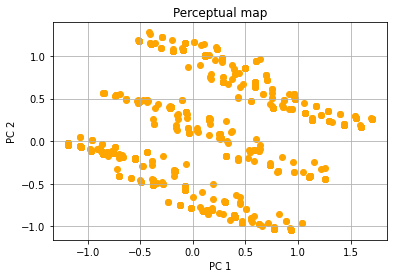

In [14]:
plt.scatter(pca_data[:, 0], pca_data[:, 1], c='orange')
plt.title("Perceptual map")
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.grid(True)
plt.show()

# EXTRACTING SEGMENTS

Text(0, 0.5, 'Clusters inertia')

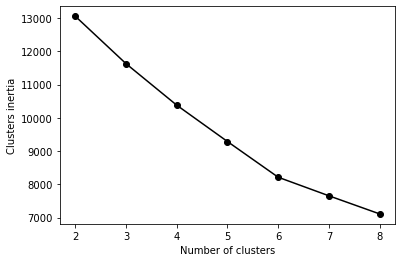

In [28]:
# Perform K-means clustering
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(mcdonalds.iloc[:, 0:11])
np.random.seed(1234)
k_range = range(2, 9)
kmeans_results = []
for k in k_range:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=1234)
    kmeans.fit(x)
    kmeans_results.append(kmeans)

km28 = kmeans.fit_predict(x)
k4 = KMeans(n_clusters=4, random_state=1234).fit_predict(x)


# Plot K-means clustering results
inertia_values = [k.inertia_ for k in kmeans_results]
plt.plot(k_range, inertia_values, marker="o",color="black")
plt.xlabel("Number of clusters")
plt.ylabel("Clusters inertia")

In [20]:
kmeans = KMeans(n_clusters=4, random_state=42,init="k-means++")
kmeans.fit(mcdonalds)
mcdonalds['Clusters'] = kmeans.labels_

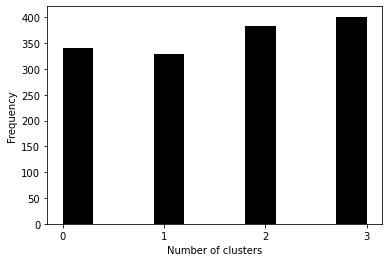

In [21]:
mcdonalds['Clusters'].hist(color="black")
plt.xlabel("Number of clusters")
plt.ylabel("Frequency")
plt.grid(False)
plt.xticks([0,1,2,3])
plt.show()

In [ ]:
# Plot mixture modeling results
from sklearn.mixture import GaussianMixture
mixture_results = []
for k in k_range:
    mixture = GaussianMixture(n_components=k, random_state=1234)
    mixture.fit(x)
    mixture_results.append(mixture)


aic_values = [model.aic(x) for model in mixture_results]
bic_values = [model.bic(x) for model in mixture_results]
icl_values = [model.lower_bound_ for model in mixture_results]
plt.plot(k_range, aic_values, marker="o", label="AIC",color="red")
plt.plot(k_range, bic_values, marker="o", label="BIC",color="blue")
plt.plot(k_range, icl_values, marker="o", label="ICL")
plt.xlabel("no. of components")
plt.ylabel("value of information criteria (AIC, BIC, ICL)")
plt.legend()

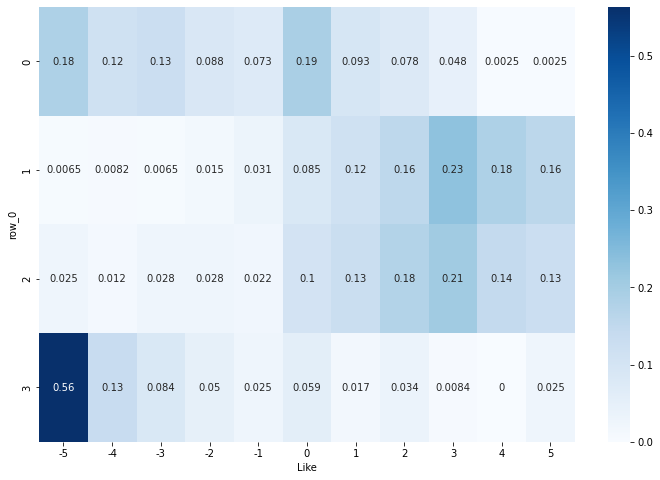

In [26]:
#plot for cluster and 'Like' column
mosaic_like = pd.crosstab(k4, mcdonalds["Like"], normalize="index")
fig, ax = plt.subplots(figsize=(12, 8))  # Increase the figsize as desired

sns.heatmap(mosaic_like, annot=True, cmap="Blues", ax=ax)

plt.show()



<AxesSubplot:xlabel='Gender', ylabel='row_0'>

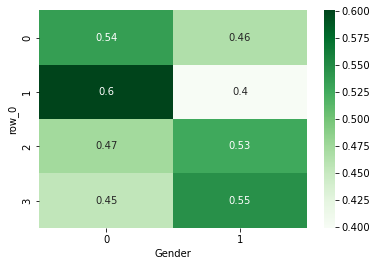

In [31]:
#  plot for cluster and 'Gender' column
mosaic_gender = pd.crosstab(k4, mcdonalds["Gender"], normalize="index")
sns.heatmap(mosaic_gender, annot=True, cmap="Greens")

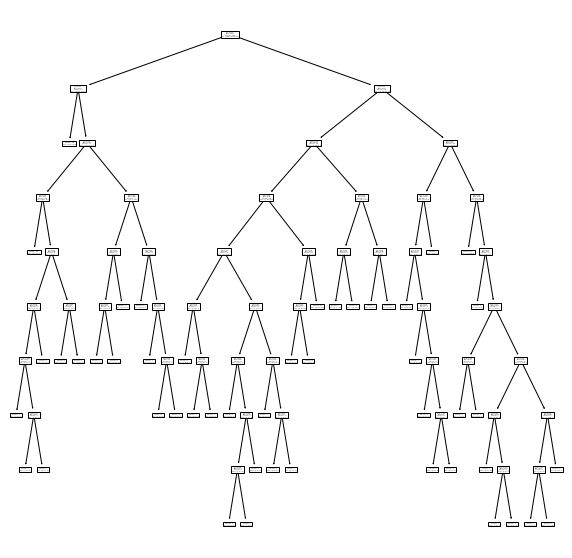

In [22]:
# Classification tree
from sklearn.tree import DecisionTreeClassifier, plot_tree

tree_formula = "np.where(k4 == 3, 1, 0) ~ Like.n + Age + VisitFrequency + Gender"
tree_data = mcdonalds.assign(k4=k4)
tree = DecisionTreeClassifier(random_state=1234)
tree.fit(tree_data.drop("k4", axis=1), tree_data["k4"])
fig, ax = plt.subplots(figsize=(10, 10))
plot_tree(tree)
plt.show()

In [23]:
# Average visit frequency by cluster
visit = mcdonalds.groupby(k4)["VisitFrequency"].mean()

print(visit)
# Average 'Like' by cluster
like = mcdonalds.groupby(k4)["Like"].mean()
print(like)

# Percentage of females by cluster
female = mcdonalds.groupby(k4)["Gender"].apply(lambda x: np.mean(x == "Female"))
print(female)

0    0.851759
1    0.985270
2    0.975385
3    0.537815
Name: VisitFrequency, dtype: float64
0   -1.590452
1    2.513912
2    1.975385
3   -3.495798
Name: Like, dtype: float64
0    0.0
1    0.0
2    0.0
3    0.0
Name: Gender, dtype: float64


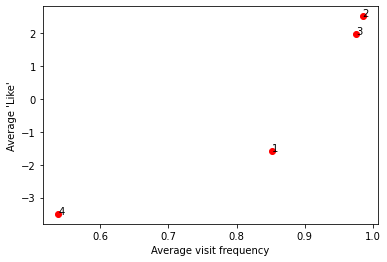

In [90]:
plt.scatter(visit, like, c='b')
for i, label in enumerate(range(1, 5)):
    plt.text(visit[i], like[i], label)

plt.xlabel("Average visit frequency")
plt.ylabel("Average 'Like'")
plt.show()

